In [1]:
import pandas as pd
from pathlib import Path 
from datetime import datetime
import sqlite3

In [2]:
conn = sqlite3.connect('LA_crime.sqlite')

In [3]:
cleaned_data = Path('Resources/Crime_Data_from_2020_to_Present.csv')
cleaned_data_df = pd.read_csv(cleaned_data)
cleaned_data_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
cleaned_data_df.drop(columns=['Date Rptd', 'TIME OCC','AREA', 'AREA NAME', 
                              'Rpt Dist No', 'Part 1-2', 'Crm Cd',
                              'Mocodes', 'Vict Age','Status','Vict Sex','Vict Age','Premis Cd','Premis Desc','Weapon Used Cd','Weapon Used Cd','Weapon Desc','Status','Status Desc', 'Crm Cd 1', 
                              'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 
                              'Cross Street'], inplace=True)

In [5]:
cleaned_data_df

,DR_NO,DATE OCC,Crm Cd Desc,Vict Descent,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,VEHICLE - STOLEN,O,34.0375,-118.3506
1,200106753,02/08/2020 12:00:00 AM,BURGLARY FROM VEHICLE,O,34.0444,-118.2628
2,200320258,11/04/2020 12:00:00 AM,BIKE - STOLEN,X,34.0210,-118.3002
3,200907217,03/10/2020 12:00:00 AM,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),O,34.1576,-118.4387
4,220614831,08/17/2020 12:00:00 AM,THEFT OF IDENTITY,H,34.0944,-118.3277
...,...,...,...,...,...,...
944230,242106032,02/17/2024 12:00:00 AM,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),O,34.2260,-118.6214
944231,242004546,01/16/2024 12:00:00 AM,BATTERY - SIMPLE ASSAULT,O,34.0690,-118.3054
944232,240104953,01/15/2024 12:00:00 AM,VANDALISM - MISDEAMEANOR ($399 OR UNDER),X,34.0685,-118.2460
944233,240309674,04/24/2024 12:00:00 AM,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",W,34.0215,-118.2868


In [6]:
cleaned_data_df[['Date', 'Time']] = cleaned_data_df['DATE OCC'].str.split(' ', n=1, expand=True)
cleaned_data_df.head()

,DR_NO,DATE OCC,Crm Cd Desc,Vict Descent,LAT,LON,Date,Time
0,190326475,03/01/2020 12:00:00 AM,VEHICLE - STOLEN,O,34.0375,-118.3506,03/01/2020,12:00:00 AM
1,200106753,02/08/2020 12:00:00 AM,BURGLARY FROM VEHICLE,O,34.0444,-118.2628,02/08/2020,12:00:00 AM
2,200320258,11/04/2020 12:00:00 AM,BIKE - STOLEN,X,34.0210,-118.3002,11/04/2020,12:00:00 AM
3,200907217,03/10/2020 12:00:00 AM,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),O,34.1576,-118.4387,03/10/2020,12:00:00 AM
4,220614831,08/17/2020 12:00:00 AM,THEFT OF IDENTITY,H,34.0944,-118.3277,08/17/2020,12:00:00 AM


In [7]:

cleaned_data_df[['Date', 'Time']] = cleaned_data_df['DATE OCC'].str.split(' ', n=1, expand=True)

columns_to_keep = ['DR_NO','Date','Time','Crm Cd Desc','Vict Descent','LAT', 'LON']

cleaned_data_df[columns_to_keep]


,DR_NO,Date,Time,Crm Cd Desc,Vict Descent,LAT,LON
0,190326475,03/01/2020,12:00:00 AM,VEHICLE - STOLEN,O,34.0375,-118.3506
1,200106753,02/08/2020,12:00:00 AM,BURGLARY FROM VEHICLE,O,34.0444,-118.2628
2,200320258,11/04/2020,12:00:00 AM,BIKE - STOLEN,X,34.0210,-118.3002
3,200907217,03/10/2020,12:00:00 AM,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),O,34.1576,-118.4387
4,220614831,08/17/2020,12:00:00 AM,THEFT OF IDENTITY,H,34.0944,-118.3277
...,...,...,...,...,...,...,...
944230,242106032,02/17/2024,12:00:00 AM,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),O,34.2260,-118.6214
944231,242004546,01/16/2024,12:00:00 AM,BATTERY - SIMPLE ASSAULT,O,34.0690,-118.3054
944232,240104953,01/15/2024,12:00:00 AM,VANDALISM - MISDEAMEANOR ($399 OR UNDER),X,34.0685,-118.2460
944233,240309674,04/24/2024,12:00:00 AM,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",W,34.0215,-118.2868


In [8]:
cleaned_data_df.drop(columns=['Time'])

cleaned_data_df.head()


,DR_NO,DATE OCC,Crm Cd Desc,Vict Descent,LAT,LON,Date,Time
0,190326475,03/01/2020 12:00:00 AM,VEHICLE - STOLEN,O,34.0375,-118.3506,03/01/2020,12:00:00 AM
1,200106753,02/08/2020 12:00:00 AM,BURGLARY FROM VEHICLE,O,34.0444,-118.2628,02/08/2020,12:00:00 AM
2,200320258,11/04/2020 12:00:00 AM,BIKE - STOLEN,X,34.0210,-118.3002,11/04/2020,12:00:00 AM
3,200907217,03/10/2020 12:00:00 AM,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),O,34.1576,-118.4387,03/10/2020,12:00:00 AM
4,220614831,08/17/2020 12:00:00 AM,THEFT OF IDENTITY,H,34.0944,-118.3277,08/17/2020,12:00:00 AM


In [9]:
# Convert 'Date' to datetime using the correct format
cleaned_data_df['Date'] = pd.to_datetime(cleaned_data_df['Date'], format='%m/%d/%Y')

# Extract the year and create a new column 'Year'
cleaned_data_df['Year'] = cleaned_data_df['Date'].dt.year

# Drop the original 'Date' column
cleaned_data_df = cleaned_data_df.drop(columns=['Date'])

# Display the updated DataFrame
cleaned_data_df.head()




,DR_NO,DATE OCC,Crm Cd Desc,Vict Descent,LAT,LON,Time,Year
0,190326475,03/01/2020 12:00:00 AM,VEHICLE - STOLEN,O,34.0375,-118.3506,12:00:00 AM,2020
1,200106753,02/08/2020 12:00:00 AM,BURGLARY FROM VEHICLE,O,34.0444,-118.2628,12:00:00 AM,2020
2,200320258,11/04/2020 12:00:00 AM,BIKE - STOLEN,X,34.0210,-118.3002,12:00:00 AM,2020
3,200907217,03/10/2020 12:00:00 AM,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),O,34.1576,-118.4387,12:00:00 AM,2020
4,220614831,08/17/2020 12:00:00 AM,THEFT OF IDENTITY,H,34.0944,-118.3277,12:00:00 AM,2020


In [10]:

# mapping dictionary
descent_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}


columns_to_keep = ['DR_NO','Crm Cd Desc', 'Vict Descent','LAT', 'LON', 'Year']

df_filtered = cleaned_data_df[columns_to_keep]

df_filtered.loc[:, 'Vict Descent'] = df_filtered['Vict Descent'].map(descent_mapping)

df_filtered.head()



,DR_NO,Crm Cd Desc,Vict Descent,LAT,LON,Year
0,190326475,VEHICLE - STOLEN,Other,34.0375,-118.3506,2020
1,200106753,BURGLARY FROM VEHICLE,Other,34.0444,-118.2628,2020
2,200320258,BIKE - STOLEN,Unknown,34.0210,-118.3002,2020
3,200907217,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),Other,34.1576,-118.4387,2020
4,220614831,THEFT OF IDENTITY,Hispanic/Latin/Mexican,34.0944,-118.3277,2020


In [11]:
cleaned_data_df.to_sql('LA_crime_data', conn, if_exists='replace', index=False)

944235

In [12]:
conn.close()

In [13]:
# Rename columns
df_filtered = df_filtered.rename(columns={
                                    "DR_NO": "Record Number", 
                                    "Crm Cd Desc": "Types of Crime",
                                    "Vict Descent": "Victim Descent",
                                    "LAT":"Latitude",
                                    "LON":"Longitude"})
df_filtered.head()

,Record Number,Types of Crime,Victim Descent,Latitude,Longitude,Year
0,190326475,VEHICLE - STOLEN,Other,34.0375,-118.3506,2020
1,200106753,BURGLARY FROM VEHICLE,Other,34.0444,-118.2628,2020
2,200320258,BIKE - STOLEN,Unknown,34.0210,-118.3002,2020
3,200907217,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),Other,34.1576,-118.4387,2020
4,220614831,THEFT OF IDENTITY,Hispanic/Latin/Mexican,34.0944,-118.3277,2020


In [14]:
# Exclude data of 2024
year_cleaned_df = df_filtered[df_filtered['Year'] != 2024]
year_cleaned_df

,Record Number,Types of Crime,Victim Descent,Latitude,Longitude,Year
0,190326475,VEHICLE - STOLEN,Other,34.0375,-118.3506,2020
1,200106753,BURGLARY FROM VEHICLE,Other,34.0444,-118.2628,2020
2,200320258,BIKE - STOLEN,Unknown,34.0210,-118.3002,2020
3,200907217,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),Other,34.1576,-118.4387,2020
4,220614831,THEFT OF IDENTITY,Hispanic/Latin/Mexican,34.0944,-118.3277,2020
...,...,...,...,...,...,...
876980,231606525,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Hispanic/Latin/Mexican,34.2790,-118.4116,2023
876981,231716047,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Hispanic/Latin/Mexican,34.2302,-118.4764,2023
876982,230115220,PICKPOCKET,Hispanic/Latin/Mexican,34.0467,-118.2485,2023
876983,230906458,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Hispanic/Latin/Mexican,34.1951,-118.4487,2023


In [15]:
# keep two columns for a line plot
columns = ['Record Number', 'Year']
total_crime_df = year_cleaned_df[columns]
total_crime_df.head()

,Record Number,Year
0,190326475,2020
1,200106753,2020
2,200320258,2020
3,200907217,2020
4,220614831,2020


In [16]:
# Count the total crimes per year
trend_df = total_crime_df.groupby(total_crime_df['Year']).count()
trend_df.reset_index(inplace=True)
trend_df.head()

,Year,Record Number
0,2020,199700
1,2021,209703
2,2022,234975
3,2023,231642


In [17]:
# Turn data type of year into a string
trend_df['Year']=trend_df['Year'].astype(str)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

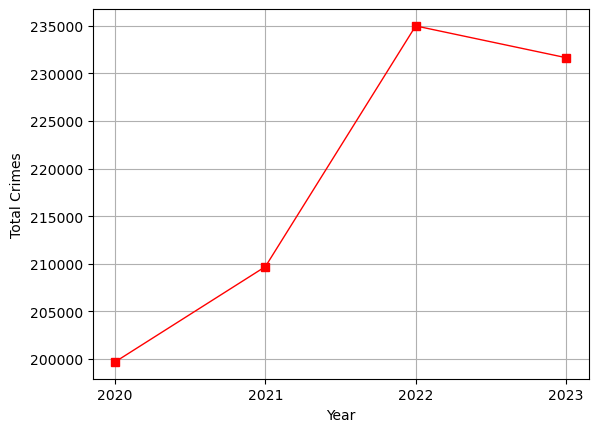

In [19]:
# Create a line graph to show the crime count 
x_axis = trend_df['Year']
y_axis = trend_df['Record Number']
plt.plot(x_axis, y_axis, marker="s", color="Red", linewidth=1)
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid()
plt.savefig('Yi_line.png')
plt.show()

In [20]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px

In [32]:
# app.py
# ...
app = Dash()
app.layout = html.Div(
    children=[
        # ...
        html.Div(
            children=[
                html.Div(
                    children=dcc.Graph(
                        id="Record Number",
                        config={"displayModeBar": False},
                        figure={
                            "data": [
                                {
                                    "x": trend_df["Year"].astype(str),
                                    "y": trend_df["Record Number"],
                                    "type": "lines"
                                },
                            ],
                            "layout": {
                                "title": {
                                    "text": "Los Angeles Total Crime Count Per Year",
                                    "xanchor": "left",
                                },
                                "xaxis": {"type": "category"},
                                "yaxis": {"fixedrange": True},
                                "colorway": ["#17b897"],
                            },
                        },
                    ),
                ),
            ],
        ),
    ]
)
if __name__ == "__main__":
    app.run_server(debug=True)

In [26]:
trend_df['Year']

0    2020
1    2021
2    2022
3    2023
Name: Year, dtype: object